In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(111)

In [7]:
preprocessed_data = pd.read_csv('online_shoppers_intention.csv')
preprocessed_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
def conditional_probabilities_bayes_theorem(col):
    # Calculate conditional probabilities
    col_prob = preprocessed_data[col].value_counts(normalize=True)

    target_prob = preprocessed_data["Revenue"].value_counts(normalize=True)[True]
    target_mask = preprocessed_data["Revenue"] == True
    
    total_entries = preprocessed_data.shape[0]
    col_and_target = preprocessed_data[target_mask][col].value_counts() / total_entries

    cond_prob = pd.DataFrame()
    cond_prob[f"P(Revenue | {col})"] = col_and_target / col_prob
    cond_prob[f"P({col} | Revenue)"] = (cond_prob[f"P(Revenue | {col})"] * col_prob) / (target_prob)

    print(cond_prob)

    # Plot probabilities
    plt.figure()
    ax = cond_prob.plot.bar(figsize=(12,8), rot=0)
    ax.set_ylabel("Probability")
    ax.set_xlabel(f'{col}')
    ax.set_title(f'Conditional Probabilities and Bayes\' Theorem for {col} Given Revenue Generated')
    plt.savefig(f'figs/conditional_probabilities_and_bayes_thearom_for_{col}_given_Revenue_Generated.png', format='png', dpi=300)

- There is 17% chance to get Revenue Generated Give the day is a weekend | There is 15% chance to get revenue-True Give the day is a weekday.
- There is 26% chance the day is a weekend given Revenue Generated | There is 74% the day is a weekday given that Revenue Generated.

       P(Revenue | Weekend)  P(Weekend | Revenue)
False              0.148911               0.73847
True               0.173989               0.26153


<Figure size 640x480 with 0 Axes>

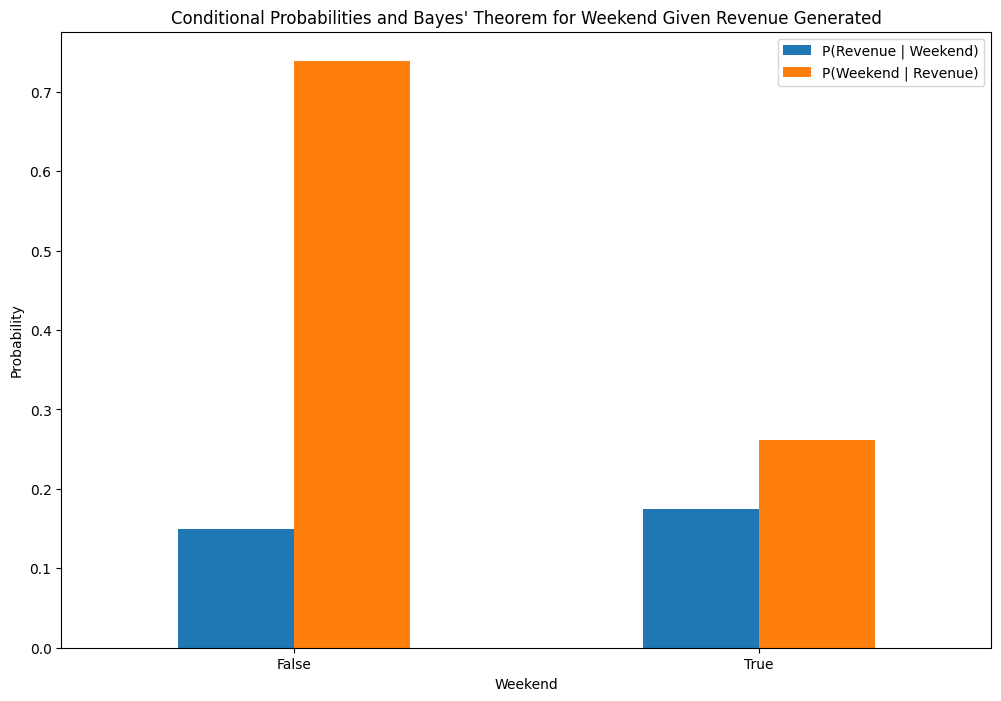

In [5]:
conditional_probabilities_bayes_theorem('Weekend')

- Browser 2 has the highest probability given Revenue Generated.
- Browser 1 has a considerable chances of getting Revenue Generated.

    P(Revenue | Browser)  P(Browser | Revenue)
1               0.148253              0.191300
2               0.153624              0.640985
3               0.047619              0.002621
4               0.176630              0.068134
5               0.184154              0.045073
6               0.114943              0.010482
7               0.122449              0.003145
8               0.155556              0.011006
9                    NaN                   NaN
10              0.196319              0.016771
11              0.166667              0.000524
12              0.300000              0.001572
13              0.262295              0.008386


<Figure size 640x480 with 0 Axes>

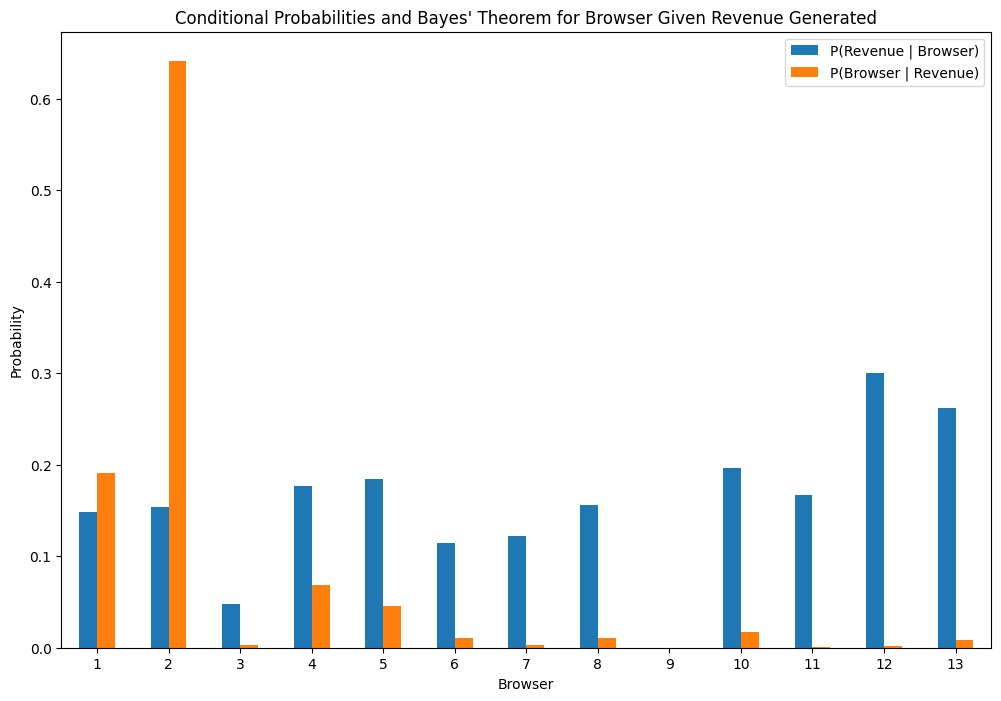

In [9]:
conditional_probabilities_bayes_theorem('Browser')

- Region 1 has the highest chance given Revenue Generated.
- Region 2, 3 have considerable chances.

   P(Revenue | Region)  P(Region | Revenue)
1             0.161297             0.404088
2             0.165493             0.098532
3             0.145235             0.182914
4             0.148054             0.091719
5             0.163522             0.027254
6             0.139130             0.058700
7             0.156373             0.062369
8             0.129032             0.029350
9             0.168297             0.045073


<Figure size 640x480 with 0 Axes>

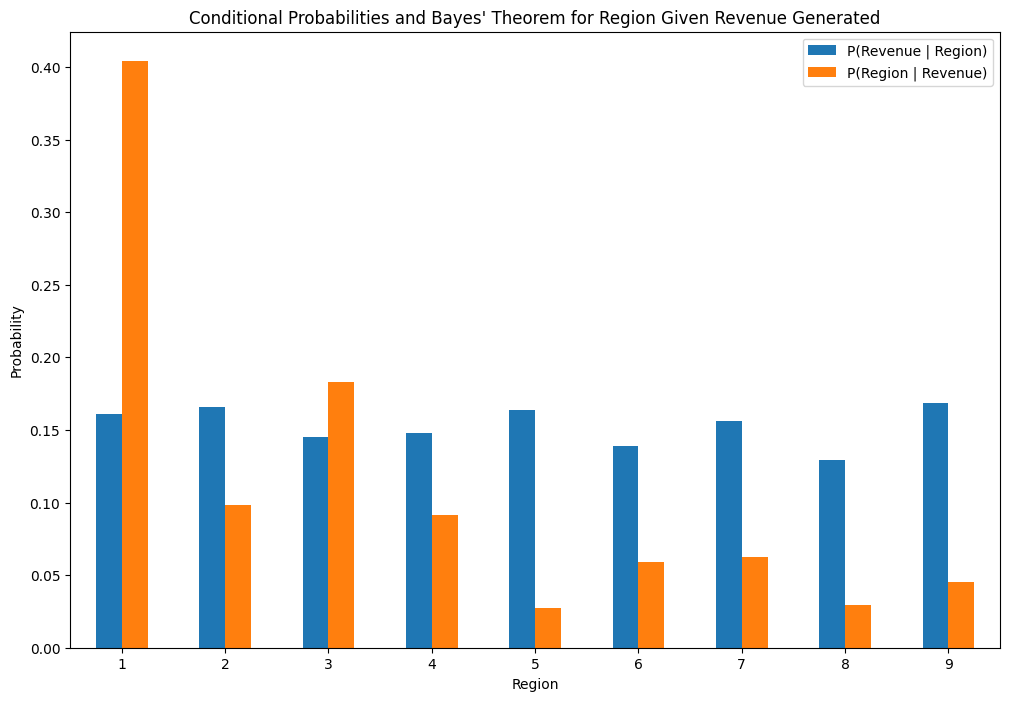

In [10]:
conditional_probabilities_bayes_theorem('Region')

- Operating System 2 has the highest chance given Revenue Generated.
- 1, 3, Operating System have considerable chances to create Revenue Generated.

   P(Revenue | OperatingSystems)  P(OperatingSystems | Revenue)
2                       0.174973                       0.605346
1                       0.146615                       0.198637
3                       0.104892                       0.140461
4                       0.177824                       0.044549
8                       0.215190                       0.008910
6                       0.105263                       0.001048
7                       0.142857                       0.000524
5                       0.166667                       0.000524


<Figure size 640x480 with 0 Axes>

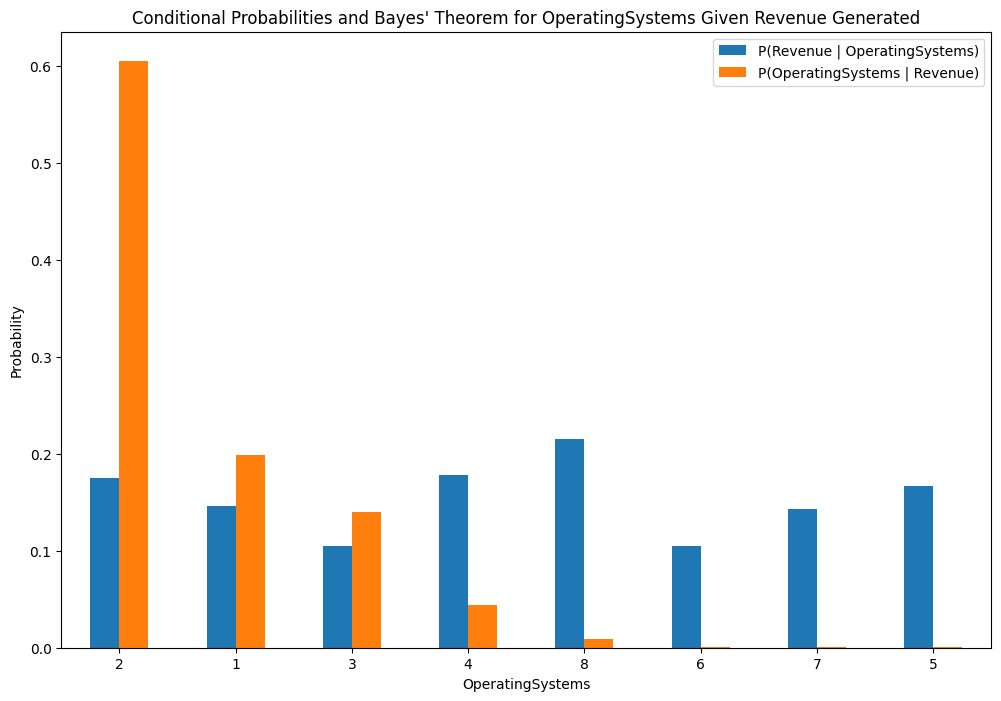

In [11]:
conditional_probabilities_bayes_theorem('OperatingSystems')

- Traffic Type 2 has the highest chance given Revnue
- Revenue Generated has Zero chances when those 12, 15, 17 and 18 Traffic Types are used.
- Traffic Type 1, 3, 4 have considerable chances of getting Revenue Generated.

    P(Revenue | TrafficType)  P(TrafficType | Revenue)
1                   0.106895                  0.137317
2                   0.216458                  0.443920
3                   0.087719                  0.094340
4                   0.154350                  0.086478
5                   0.215385                  0.029350
6                   0.119369                  0.027778
7                   0.300000                  0.006289
8                   0.276968                  0.049790
9                   0.095238                  0.002096
10                  0.200000                  0.047170
11                  0.190283                  0.024633
12                       NaN                       NaN
13                  0.058266                  0.022537
14                  0.153846                  0.001048
15                       NaN                       NaN
16                  0.333333                  0.000524
17                       NaN                       NaN
18        

<Figure size 640x480 with 0 Axes>

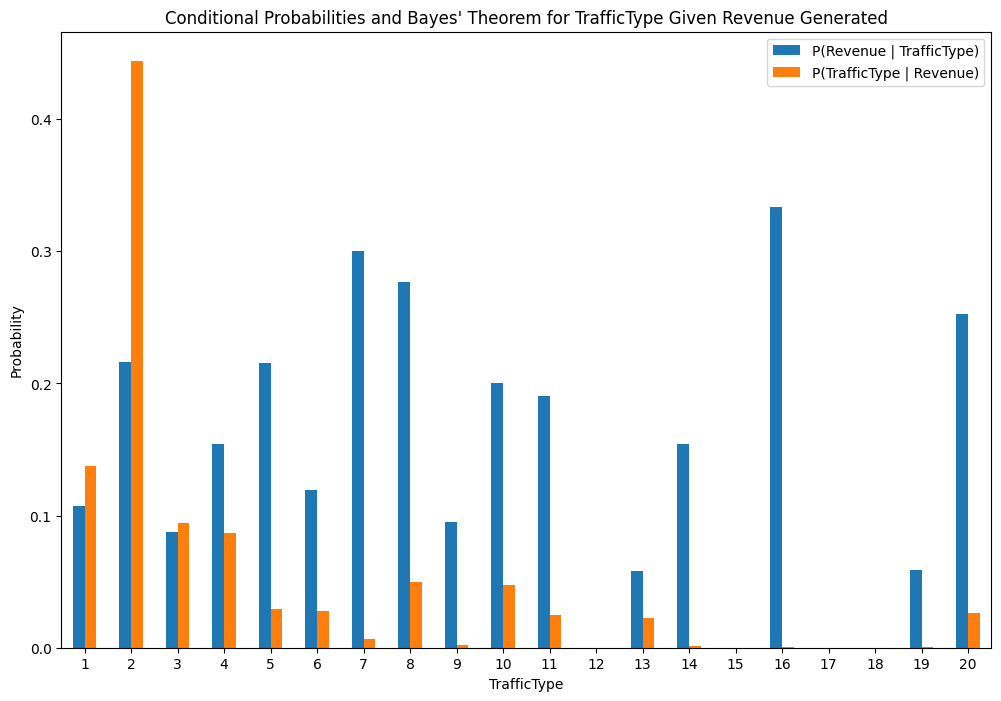

In [12]:
conditional_probabilities_bayes_theorem('TrafficType')

- Special Day value 0.0 has the top chance given revenue and also revenue has higher chances given value 0.0

     P(Revenue | SpecialDay)  P(SpecialDay | Revenue)
0.0                 0.165268                 0.959644
0.2                 0.078652                 0.007338
0.4                 0.053498                 0.006813
0.6                 0.082621                 0.015199
0.8                 0.033846                 0.005765
1.0                 0.064935                 0.005241


<Figure size 640x480 with 0 Axes>

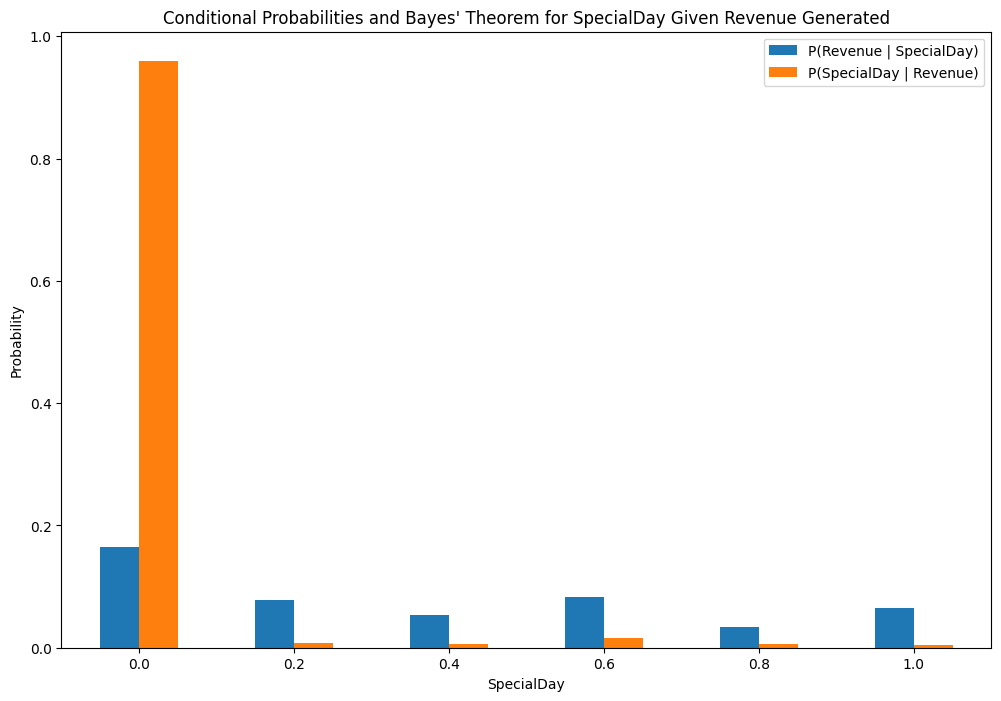

In [13]:
conditional_probabilities_bayes_theorem('SpecialDay')

- November has the highest month of getting revenue. 
- May, Mar, Dec have considerable chances of having Revenue Generated.

      P(Revenue | Month)  P(Month | Revenue)
Aug             0.175520            0.039832
Dec             0.125072            0.113208
Feb             0.016304            0.001572
Jul             0.152778            0.034591
June            0.100694            0.015199
Mar             0.100682            0.100629
May             0.108502            0.191300
Nov             0.253502            0.398323
Oct             0.209472            0.060273
Sep             0.191964            0.045073


<Figure size 640x480 with 0 Axes>

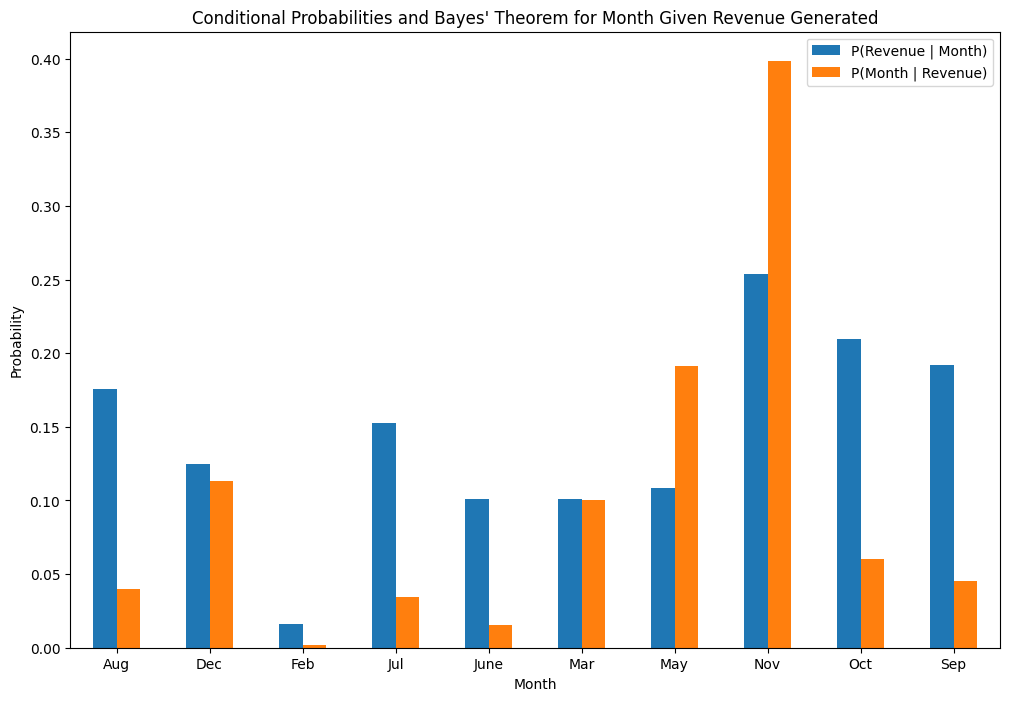

In [14]:
conditional_probabilities_bayes_theorem('Month')

- Returning Visitors have higher chances of getting Revenue Generated, with a considerable chance for New Visitors.

                   P(Revenue | VisitorType)  P(VisitorType | Revenue)
Returning_Visitor                  0.139323                  0.770440
New_Visitor                        0.249115                  0.221174
Other                              0.188235                  0.008386


<Figure size 640x480 with 0 Axes>

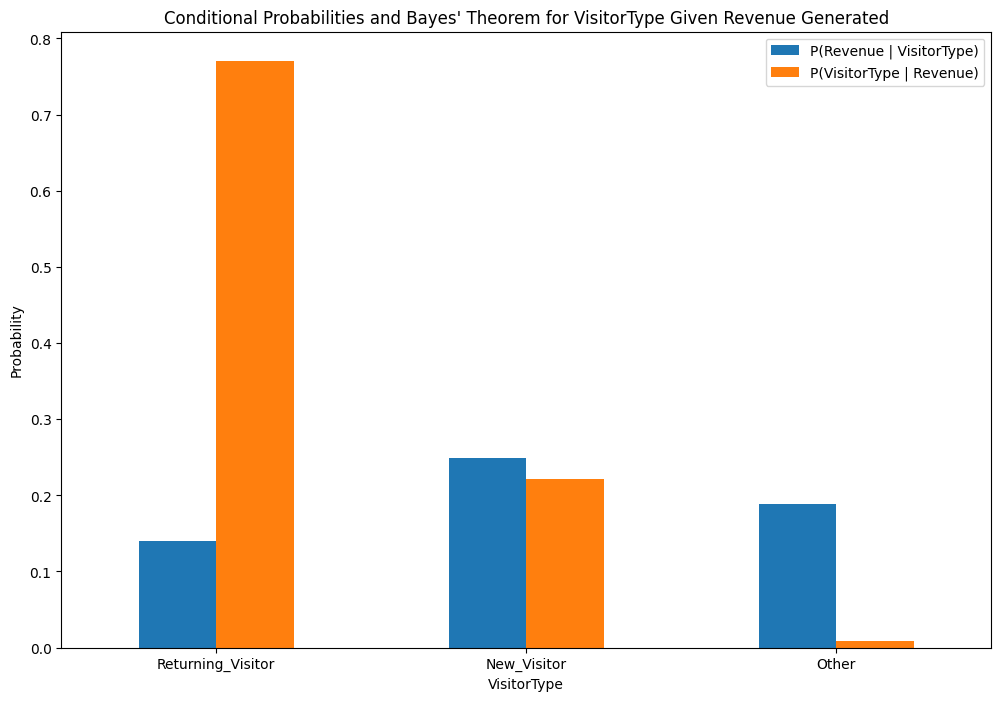

In [15]:
conditional_probabilities_bayes_theorem('VisitorType')